In [1]:
#!/usr/bin/python3
from sklearn.svm import OneClassSVM
import pandas as pd
import feather
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import pickle
np.random.seed(500)
import time
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold

In [3]:
# pickle_in = open("df_lemma_yelp_chicago_hot.pickle","rb")
# df = pickle.load(pickle_in)
df = pd.read_table("Data/YelpChi/output_review_yelpHotelData_NRYRcleaned.txt",header=None)
df2 = pd.read_table("Data/YelpChi/output_meta_yelpHotelData_NRYRcleaned.txt",header=None, sep=" ")
df['label'] =  df2[4]
df['label'] = df['label'].replace(['N'],1)
df['label'] = df['label'].replace(['Y'],-1)
df.columns = ['review_content', 'label']

In [4]:
df

,review_content,label
0,Let me begin by saying that there are two kind...,1
1,The only place inside the Loop that you can st...,1
2,I have walked by the Tokyo Hotel countless tim...,1
3,"If you are considering staying here, watch thi...",1
4,"This place is disgusting, absolutely horrible,...",1
...,...,...
5849,"This hotel is amazing! Granted, I worked here,...",-1
5850,Short Version: I am very torn about this place...,-1
5851,Sutton Place is a very elegant hotel. The room...,-1
5852,The only great thing is location. Rest of the ...,-1


In [6]:
pos=0 
neg = 0

for x in df['label']:
    if x == -1:
        neg+=1
    else:
        pos+=1
print ('negative: ', neg , ' positive:' , pos, 'total', neg+pos,'percent deceptive', neg*100.0/(neg+pos)) 

negative:  778  positive: 5076 total 5854 percent deceptive 13.290058079945336


In [256]:
df.dtypes

review_content    object
label              int64
tokenized         object
text_final        object
dtype: object

In [36]:
array = df.values.tolist()
array = np.array(array)
x = array[:,0]
x = x.tolist()
y = array[:,1]
y = y.tolist()
x.shape

5854

In [38]:
#undersample = RandomUnderSampler(sampling_strategy='majority')
undersample = RandomUnderSampler(sampling_strategy='majority')
#oversample = RandomOverSampler(sampling_strategy='minority')
X_under, y_under = undersample.fit_resample(x, y)
#X_over, y_over = oversample.fit_resample(X, df['label'])
d = {'text_final':X_under,'label':y_under}
dfu = pd.DataFrame(d)

ValueError: Expected 2D array, got 1D array instead:
array=["Let me begin by saying that there are two kinds of people, those who will give the Tokyo Hotel 5 stars and rave about it to everyone they know, or... people who can't get past the broken phone, blood stains, beeping fire alarms, peg-legged receptionist, lack of water pressure, cracked walls, strange smells, questionable elevator, televisions left to die after the digital conversion, and the possibility that the air conditioner may fall out the window at any moment. That being said, I whole-heartedly give the Tokyo Hotel 5 stars. This is not a place to quietly slip in and out of with nothing to show but a faint memory of the imitation Thomas Kinkade painting bolted to the wall above your bed. And, there is no continental breakfast or coffee in the lobby. There are a few vending machines, but I'm pretty sure they wont take change minted after 1970. Here your senses will be assaulted, and after you leave you will have enough memories to compete with a 1,000 mile road-trip. I beg anyone who is even mildly considering staying here to give it a chance. The location is prime. We were able to walk down Michigan Ave and the river-walk in the middle of the night, all without straying too far from the hotel. There is a grocery store a block away and parking (which may cost more that your hotel room) across the street. Besides, this place is cheap. Super-cheap for downtown Chicago. The closest price we found in the area was four times as expensive. But, be sure to grab some cash. They don't accept credit cards. Some rules though: - Say hello to Clifton Jackson, the homeless guy by Jewel-Osco. - Buy him a drink, some chicken and look him up on Facebook. - Stay on the 17 floor. All the way at the top. - Go out the fire escape (be sure to prop the door open or you'll have a looong walk down) - Be very very careful. - Explore. (Yes, that ladder will hold your weight) - Be very very careful. - Don't be alarmed by any weird noises you hear. - Spend the night on the roof. 17 stories up, in the heart of Chicago. - Write your own Yelp review. I want to see that others are getting the Tokyo Hotel Experience. - Check out is at noon. Be sure to drink lots of water. - Spend the next day hung over. And... Please be careful on the roof."
 'The only place inside the Loop that you can stay for $55/night. Also, the only place you can have a picnic dinner and get a little frisky on the 17th floor roof and then wake up in your room the next morning to an army of ants going in on your picnic leftovers.'
 'I have walked by the Tokyo Hotel countless times. It reminds me of the type place that Peter Parker lives in in the Spiderman movies, Or the sort of place Marla Singer might live in, or maybe it is a carbon copy of the Hotel Zamenhof. Basically it is scuzzy and sleazy, through and through it is a fleabag, and I love it. Yesterday I finally walked in. I don\'t know why. Maybe because I just told my roommates and my landlord that I wouldn\'t be signing another lease, essentially leaving me "pre-homeless". Maybe because earlier that day I told boss that I\'m quitting my job at the end of July, leaving me "pre-unemployed". Maybe because after all this time teetering between living on the edge of salvation and the brink of self destruction, I\'m finally choosing my path, I\'m hitting bottom. I\'m giving up. Shit maybe I\'m Nick Cage in Leaving Las Vegas, but where is my Elizabeth Shue? Who will look after me, who will walk me gently into that good night? If I choose to stay in this city, the city I love, then I may just stay in the "Hotel Tokyo". Because if I choose to stay, and that is a big if, then I\'m going to need to stay somewhere cheap, with like-minded vagabonds, vagrants and naredowells. I\'ll need help, I\'ll need guidance.'
 ...
 "Sutton Place is a very elegant hotel. The room and staff were excellent. Room service did a spectacular job cleaning the room while I was away. The bed was a little harder than expected, but still comfortable. If I'm ever in the area again, this would be the hotel I would stay at."
 'The only great thing is location. Rest of the hotel is very forgettable, lacks any character. Decor is stuck in the 90s. Their customer service is extremely poor. After our stay, we checked out and left the hotel for 1 hour. We then realized my husband left his wedding ring on bedside table, so returned immediately to get it. The room had just been cleaned, and I went in and the ring was gone. The person who cleaned it said it wasn\'t there, but I know exactly where it was, and it was there. So it was stolen. The hotel launched an "investigation" where they determined that they were not at fault, and send me a letter letting me know that they would be doing nothing. So we stayed in a mediocre hotel, and lost a wedding ring. All in all, not a way to treat your customers. If you stay here, hide your valuables.'
 'Noise, noise, noise! Unbelievable! Between the overly loud music and the tons of loud motorcylces, people screaming - this is ridiculous!'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [8]:
df.describe()

,label
count,5854.000000
mean,0.734199
std,0.678993
min,-1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [9]:
df.iloc[390,:]

review_content    for it's location and it's price, the hilton g...
label                                                             1
tokenized         [for, it, 's, location, and, it, 's, price, ,,...
text_final        ['location', 'price', 'hilton', 'garden', 'inn...
Name: 390, dtype: object

In [44]:
# # Step - a : Remove blank rows if any.
# df['review_content'].dropna(inplace=True)

In [45]:
# # Step - b : Change all the text to lower case
# df['review_content'] = [entry.lower() for entry in df['review_content']]

In [46]:
# # Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
# # tokenized = []
# # for index,entry in enumerate(genuine['review_content']): 
# #     genuine.loc[index,'tokenized'] = [word_tokenize(entry)]
# #     percent = index/len(genuine)*100
# #     print('percent done [%d%%]\r'%percent, end="")
# df['tokenized']= [word_tokenize(entry) for entry in df['review_content']]

In [10]:
df

,review_content,label,tokenized,text_final
0,let me begin by saying that there are two kind...,1,"[let, me, begin, by, saying, that, there, are,...","['let', 'begin', 'say', 'two', 'kind', 'people..."
1,the only place inside the loop that you can st...,1,"[the, only, place, inside, the, loop, that, yo...","['place', 'inside', 'loop', 'stay', 'also', 'p..."
2,i have walked by the tokyo hotel countless tim...,1,"[i, have, walked, by, the, tokyo, hotel, count...","['walk', 'tokyo', 'hotel', 'countless', 'time'..."
3,"if you are considering staying here, watch thi...",1,"[if, you, are, considering, staying, here, ,, ...","['consider', 'stay', 'watch', 'first', 'http']"
4,"this place is disgusting, absolutely horrible,...",1,"[this, place, is, disgusting, ,, absolutely, h...","['place', 'disgust', 'absolutely', 'horrible',..."
...,...,...,...,...
5849,"this hotel is amazing! granted, i worked here,...",-1,"[this, hotel, is, amazing, !, granted, ,, i, w...","['hotel', 'amazing', 'grant', 'work', 'might',..."
5850,short version: i am very torn about this place...,-1,"[short, version, :, i, am, very, torn, about, ...","['short', 'version', 'torn', 'place', 'great',..."
5851,sutton place is a very elegant hotel. the room...,-1,"[sutton, place, is, a, very, elegant, hotel, ....","['sutton', 'place', 'elegant', 'hotel', 'room'..."
5852,the only great thing is location. rest of the ...,-1,"[the, only, great, thing, is, location, ., res...","['great', 'thing', 'location', 'rest', 'hotel'..."


In [49]:
# # Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# # WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
# tag_map = defaultdict(lambda : wn.NOUN)
# tag_map['J'] = wn.ADJ
# tag_map['V'] = wn.VERB
# tag_map['R'] = wn.ADV
# final_text = [None]*len(df['tokenized'])
# for index,entry in enumerate(df['tokenized']):
#     # Declaring Empty List to store the words that follow the rules for this step
#     Final_words = []
#     # Initializing WordNetLemmatizer()
#     percent = float(index/len(df['tokenized'])*100)

#     print('percent done [%f%%]\r'%percent, end="")
#     word_Lemmatized = WordNetLemmatizer()
#     # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
#     for word, tag in pos_tag(entry):
#         # Below condition is to check for Stop words and consider only alphabets
#         if word not in stopwords.words('english') and word.isalpha():
#             word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
#             Final_words.append(word_Final)
#     # The final processed set of words for each iteration will be stored in 'text_final'
#     df.loc[index,'text_final'] = str(Final_words)
#     final_text[index]=(Final_words)
    


In [51]:
# #to save the preporcessed list

# pickle_out = open("df_lemma_yelp_chicago.pickle","wb")
# pickle.dump(df, pickle_out)
# pickle_out.close()

In [258]:
Tfidf_vect = TfidfVectorizer(max_features=50000)        
Tfidf_vect.fit(df['text_final'])

TfidfVectorizer(max_features=50000)

In [259]:
X = Tfidf_vect.transform(df['text_final'])

In [260]:
X

<5854x15035 sparse matrix of type '<class 'numpy.float64'>'
	with 364429 stored elements in Compressed Sparse Row format>

In [263]:
X_under

<1556x15035 sparse matrix of type '<class 'numpy.float64'>'
	with 89984 stored elements in Compressed Sparse Row format>

In [262]:
pos=0 
neg = 0
for x in y_under:
    if x == -1:
        neg+=1
    else:
        pos+=1
print ('negative: ', neg , ' positive:' , pos, 'total', neg+pos,'percent deceptive', neg*100.0/(neg+pos)) 

negative:  778  positive: 778 total 1556 percent deceptive 50.0


In [204]:
Train_X_oc_all, Test_X_oc_all = model_selection.train_test_split(dfu[['label','text_final']],test_size=0.3)

In [205]:
# check test genuine/deceptive
pos=0 
neg = 0

for x in Test_X_oc_all['label']:
    if x == -1:
        neg+=1
    else:
        pos+=1
print ('negative: ', neg , ' positive:' , pos, 'total', neg+pos,'percent deceptive', neg*100.0/(neg+pos)) 

negative:  237  positive: 230 total 467 percent deceptive 50.74946466809422


In [206]:
# split using genuine
Train_X, Test_X = model_selection.train_test_split((Train_X_oc_all.loc[(dfu['label'] == 1)]).text_final,test_size=0.3)


In [207]:
#split using deceptive
Train_X_dec, Test_X_dec = model_selection.train_test_split((Train_X_oc_all.loc[(dfu['label'] == -1)]).text_final,test_size=0.3)

In [211]:
# #vectorizing genuine data
# Train_X_Tfidf = Tfidf_vect.transform(Train_X)
# Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [212]:
# # vectorizing deceptive data
# Train_X_Tfidf_dec = Tfidf_vect.transform(Train_X_dec)
# Test_X_Tfidf_dec = Tfidf_vect.transform(Test_X_oc_all['text_final'])

In [213]:
# vectorizing all data
Test_X_Tfidf_all = Tfidf_vect.transform(df['text_final'])

In [214]:
Train_X_dec

631      (0, 14845)\t0.13971386881525447\n  (0, 14798...
367      (0, 14845)\t0.13971386881525447\n  (0, 14798...
283      (0, 14845)\t0.13971386881525447\n  (0, 14798...
621      (0, 14845)\t0.13971386881525447\n  (0, 14798...
623      (0, 14845)\t0.13971386881525447\n  (0, 14798...
                             ...                        
45       (0, 14845)\t0.13971386881525447\n  (0, 14798...
83       (0, 14845)\t0.13971386881525447\n  (0, 14798...
78       (0, 14845)\t0.13971386881525447\n  (0, 14798...
254      (0, 14845)\t0.13971386881525447\n  (0, 14798...
574      (0, 14845)\t0.13971386881525447\n  (0, 14798...
Name: text_final, Length: 378, dtype: object

In [215]:
Test_X

1426      (0, 14845)\t0.13971386881525447\n  (0, 14798...
971       (0, 14845)\t0.13971386881525447\n  (0, 14798...
1440      (0, 14845)\t0.13971386881525447\n  (0, 14798...
1089      (0, 14845)\t0.13971386881525447\n  (0, 14798...
1037      (0, 14845)\t0.13971386881525447\n  (0, 14798...
                              ...                        
921       (0, 14845)\t0.13971386881525447\n  (0, 14798...
873       (0, 14845)\t0.13971386881525447\n  (0, 14798...
993       (0, 14845)\t0.13971386881525447\n  (0, 14798...
1004      (0, 14845)\t0.13971386881525447\n  (0, 14798...
958       (0, 14845)\t0.13971386881525447\n  (0, 14798...
Name: text_final, Length: 165, dtype: object

In [216]:
print(Tfidf_vect.vocabulary_)

{'let': 7607, 'begin': 1181, 'say': 11486, 'two': 13801, 'kind': 7317, 'people': 9712, 'give': 5605, 'tokyo': 13510, 'hotel': 6376, 'star': 12587, 'rave': 10660, 'everyone': 4548, 'know': 7369, 'ca': 1800, 'get': 5549, 'past': 9603, 'broken': 1640, 'phone': 9819, 'blood': 1411, 'stain': 12559, 'beep': 1173, 'fire': 4993, 'alarm': 324, 'receptionist': 10728, 'lack': 7419, 'water': 14557, 'pressure': 10224, 'crack': 2994, 'wall': 14499, 'strange': 12744, 'smell': 12149, 'questionable': 10527, 'elevator': 4249, 'television': 13221, 'leave': 7551, 'die': 3613, 'digital': 3631, 'conversion': 2854, 'possibility': 10112, 'air': 298, 'conditioner': 2693, 'may': 8153, 'fall': 4797, 'window': 14752, 'moment': 8548, 'place': 9921, 'quietly': 10538, 'slip': 12098, 'nothing': 9003, 'show': 11882, 'faint': 4782, 'memory': 8240, 'imitation': 6575, 'thomas': 13362, 'kinkade': 7328, 'paint': 9491, 'bolt': 1464, 'bed': 1154, 'continental': 2820, 'breakfast': 1580, 'coffee': 2483, 'lobby': 7744, 'vending

In [220]:
# fit the training dataset on the classifier using [deceptive]
start_time = time.time()

clf_dec = OneClassSVM(gamma='auto', kernel='poly', degree=5).fit(Train_X_dec)
elapsed_time = time.time() - start_time
print('elapsed_time' , elapsed_time)
# predict the labels on validation dataset

ValueError: setting an array element with a sequence.

In [27]:
# predict using deceptive
start_time = time.time()
predictions_oneclass_dec = clf_dec.predict(Test_X_Tfidf_dec)
print(predictions_oneclass_dec)
elapsed_time = time.time() - start_time
print('elapsed_time' , elapsed_time)
# Use accuracy_score function to get the accuracy

[-1 -1 -1 ... -1 -1 -1]
elapsed_time 0.1723928451538086


In [28]:
# deceptive predict count
pos=0 
neg = 0

for x in predictions_oneclass_dec:
    if x == -1:
        neg+=1
    else:
        pos+=1
print ('negative: ', neg , ' positive:' , pos)       

negative:  1757  positive: 0


In [110]:
cf_matrix=confusion_matrix(Test_X_oc_all['label'], predictions_oneclass_dec*-1)
metrics_result = precision_recall_fscore_support(Test_X_oc_all['label'], predictions_oneclass_dec*-1, average='weighted',zero_division=0)
print("Accuracy Score -> ",accuracy_score(predictions_oneclass_dec*-1, Test_X_oc_all['label'], normalize=True))
print("percision: ", metrics_result[0], ' recall: ' , metrics_result[1], ' fscore: ', metrics_result[2])
#print(metrics.f1_score(Test_X_oc_all['label'], predictions_oneclass_dec*-1, average='weighted'))
#sns.heatmap(cf_matrix, annot=True)

Accuracy Score ->  0.8645418326693227
percision:  0.7474325804352312  recall:  0.8645418326693227  fscore:  0.801733237988218


<AxesSubplot:>

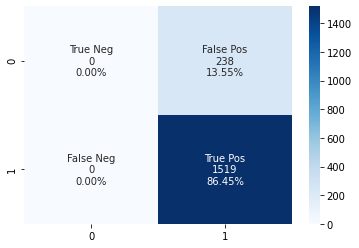

In [103]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


In [95]:
# fit the training dataset on the classifier using [genuine]
start_time = time.time()

clf_gen = OneClassSVM(gamma='auto', kernel='poly', degree=5).fit(Train_X_Tfidf)
elapsed_time = time.time() - start_time
print('elapsed_time' , elapsed_time)
# predict the labels on validation dataset

elapsed_time 1.7063086032867432


In [31]:
# predict using [genuine]
start_time = time.time()
predictions_oneclass_gen = clf_gen.predict(Test_X_Tfidf_dec)
print(predictions_oneclass_gen)
elapsed_time = time.time() - start_time
print('elapsed_time' , elapsed_time)
# Use accuracy_score function to get the accuracy

[-1 -1 -1 ... -1 -1 -1]
elapsed_time 1.2844364643096924


In [32]:
# count of prediction using [genuine]
pos=0 
neg = 0

for x in predictions_oneclass_gen:
    if x == -1:
        neg+=1
    else:
        pos+=1
print ('negative: ', neg , ' positive:' , pos)   

negative:  1757  positive: 0


In [33]:
print("Accuracy Score -> ",accuracy_score(predictions_oneclass_gen, Test_X_oc_all['label'], normalize=True))

Accuracy Score ->  0.13545816733067728


In [ ]:
# # to save the classifier model

# pickle_out = open("clf_oneclass.pickle","wb")
# pickle.dump(clf, pickle_out)
# pickle_out.close()

In [109]:
len(predictions_oneclass)

54407

In [68]:
df

,review_content,label,tokenized,text_final
0,let me begin by saying that there are two kind...,1,"[let, me, begin, by, saying, that, there, are,...","['let', 'begin', 'say', 'two', 'kind', 'people..."
1,the only place inside the loop that you can st...,1,"[the, only, place, inside, the, loop, that, yo...","['place', 'inside', 'loop', 'stay', 'also', 'p..."
2,i have walked by the tokyo hotel countless tim...,1,"[i, have, walked, by, the, tokyo, hotel, count...","['walk', 'tokyo', 'hotel', 'countless', 'time'..."
3,"if you are considering staying here, watch thi...",1,"[if, you, are, considering, staying, here, ,, ...","['consider', 'stay', 'watch', 'first', 'http']"
4,"this place is disgusting, absolutely horrible,...",1,"[this, place, is, disgusting, ,, absolutely, h...","['place', 'disgust', 'absolutely', 'horrible',..."
...,...,...,...,...
5849,"this hotel is amazing! granted, i worked here,...",-1,"[this, hotel, is, amazing, !, granted, ,, i, w...","['hotel', 'amazing', 'grant', 'work', 'might',..."
5850,short version: i am very torn about this place...,-1,"[short, version, :, i, am, very, torn, about, ...","['short', 'version', 'torn', 'place', 'great',..."
5851,sutton place is a very elegant hotel. the room...,-1,"[sutton, place, is, a, very, elegant, hotel, ....","['sutton', 'place', 'elegant', 'hotel', 'room'..."
5852,the only great thing is location. rest of the ...,-1,"[the, only, great, thing, is, location, ., res...","['great', 'thing', 'location', 'rest', 'hotel'..."


In [138]:
X_train_all, X_validation_all, Y_train_all, Y_validation_all = train_test_split(Tfidf_vect.transform(df['text_final']), df['label'], test_size=0.30, random_state=1,stratify=df['label'] )

In [139]:
pos=0 
neg = 0
for x in Y_train_all:
    if x == -1:
        neg+=1
    else:
        pos+=1
print ('negative: ', neg , ' positive:' , pos, 'total', neg+pos,'percent deceptive', neg*100.0/(neg+pos)) 

negative:  544  positive: 3553 total 4097 percent deceptive 13.278008298755188


In [140]:
# classifier checker

# your code
models = []
#models.append(['Logistic Regression', LogisticRegression(solver='liblinear', multi_class='ovr'),[],0,0])
#models.append(['Linear Discriminant Analysis', LinearDiscriminantAnalysis(),[],0,0])
#models.append(['K Nearest Neighbor', KNeighborsClassifier(),[],0,0])
#models.append(['Decesion Tree Classifier', DecisionTreeClassifier(),[],0,0])
#models.append(['Gaussien Naive Bayes', GaussianNB(),[],0,0])
models.append(['Support Vector Machine', SVC(gamma='auto',verbose=True),[],0,0])
#models.append(['Random Forest', RandomForestClassifier(max_depth = 1000,random_state=1),[],0,0])

models = np.array(models,dtype=object)

for i in range(len(models)):
    start_time = time.time()
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(models[i,1], X_train_all, Y_train_all, cv=kfold, scoring='accuracy')
    models[i,2] = cv_results
    models[i,3] = cv_results.mean()
    models[i,4] = cv_results.std()
    elapsed_time = time.time() - start_time
    print('%s: %f (%f) elapsed time: %f' % (models[i,0], models[i,3], models[i,4],elapsed_time))
    
    

best_model= models[np.argmax(models[:,3]),:]
print("the best model performer is: ", best_model[0])

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Support Vector Machine: 0.867220 (0.001123) elapsed time: 23.197695
the best model performer is:  Support Vector Machine


In [149]:
clf_model=SVC(gamma='auto',kernel='poly',degree=2).fit(X_train_all, Y_train_all)

In [150]:
result=clf_model.predict(X_validation_all)

In [151]:
pos=0 
neg = 0
for x in result:
    if x == -1:
        neg+=1
    else:
        pos+=1
print ('negative: ', neg , ' positive:' , pos, 'total', neg+pos,'percent deceptive', neg*100.0/(neg+pos)) 

negative:  0  positive: 1757 total 1757 percent deceptive 0.0


In [126]:
print("Accuracy Score -> ",accuracy_score(result, Y_validation_all, normalize=True))

Accuracy Score ->  0.8787706317586795


[   0    1    2 ... 4689 4690 4691]
[204530]


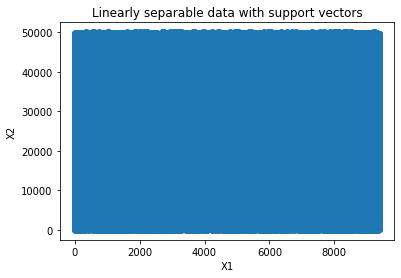

In [96]:
#visualize svm
# Get support vector indices
support_vector_indices = clf_dec.support_
print(support_vector_indices)
# Get number of support vectors per class
support_vectors_per_class = clf_dec.n_support_
print(support_vectors_per_class)
# Get support vectors themselves
support_vectors = clf_dec.support_vectors_

# Visualize support vectors
Train_X_Tfidf_dec_mtlb = Train_X_Tfidf_dec.todok()
xy = np.array(list(Train_X_Tfidf_dec_mtlb.keys()))
vals = np.array(list(Train_X_Tfidf_dec_mtlb.values()))

plt.scatter(xy[:,0], xy[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [112]:
# fit the training dataset on the classifier
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
degrees = [2,3,5,7,9]
classifiers = []
for kern in kernels:
    start_time = time.time()
    if kern == 'poly':
        for deg in degrees:
            start_time = time.time()
            clf_result = OneClassSVM(gamma='auto', kernel=kern, degree=deg).fit(Train_X_Tfidf_dec)
            elapsed_time = time.time() - start_time
            classifiers.append([kern,deg,clf_result,elapsed_time])
            print('kernel used: ' , kern, ' degree used: ' , deg, ' elapsed_time:' , elapsed_time)
            
    else:
        clf_result = OneClassSVM(gamma='auto', kernel=kern).fit(Train_X_Tfidf_dec)
        elapsed_time = time.time() - start_time
        classifiers.append([kern,0,clf_result,elapsed_time])
        print('kernel used: ' , kern, ' elapsed_time: ' , elapsed_time)

# predict the labels on validation dataset

kernel used:  linear  elapsed_time:  0.054088592529296875
kernel used:  poly  degree used:  2  elapsed_time: 0.03550291061401367
kernel used:  poly  degree used:  3  elapsed_time: 0.03359842300415039
kernel used:  poly  degree used:  5  elapsed_time: 0.0325927734375
kernel used:  poly  degree used:  7  elapsed_time: 0.03481030464172363
kernel used:  poly  degree used:  9  elapsed_time: 0.033537864685058594
kernel used:  rbf  elapsed_time:  0.03759121894836426
kernel used:  sigmoid  elapsed_time:  0.03521919250488281


kernel used:  linear  degree used: 0  elapsed_time:  0.1719365119934082  accuracy:  0.5406943653955606
percision:  0.49602673485870935  recall:  0.4916450451148201  fscore:  0.439021263716373
kernel used:  poly  degree used: 2  elapsed_time:  0.17594170570373535  accuracy:  0.8457598178713717
percision:  0.5143024422883907  recall:  0.5033110018200829  fscore:  0.4858851005615727
kernel used:  poly  degree used: 3  elapsed_time:  0.16969728469848633  accuracy:  0.8645418326693227
percision:  0.43227091633466136  recall:  0.5  fscore:  0.46367521367521364
kernel used:  poly  degree used: 5  elapsed_time:  0.1641981601715088  accuracy:  0.8645418326693227
percision:  0.43227091633466136  recall:  0.5  fscore:  0.46367521367521364
kernel used:  poly  degree used: 7  elapsed_time:  0.16422629356384277  accuracy:  0.8645418326693227
percision:  0.43227091633466136  recall:  0.5  fscore:  0.46367521367521364
kernel used:  poly  degree used: 9  elapsed_time:  0.19561147689819336  accuracy:  0

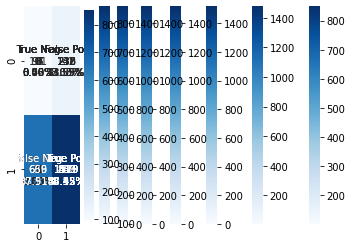

In [119]:
clas_result = []
for clas in classifiers:
    start_time = time.time()
    predict_result = clas[2].predict(Test_X_Tfidf_dec)
    elapsed_time = time.time() - start_time
    clas_result.append([clas[0],clas[1],clas[2],predict_result])
    acc = accuracy_score(predict_result*-1, Test_X_oc_all['label'], normalize=True)
    metrics_result = precision_recall_fscore_support(Test_X_oc_all['label'], predict_result*-1, average='macro',zero_division=0)
    print('kernel used: ' , clas[0], ' degree used:' , clas[1], ' elapsed_time: ' , elapsed_time, ' accuracy: ', acc)
    print("percision: ", metrics_result[0], ' recall: ' , metrics_result[1], ' fscore: ', metrics_result[2])  
    cf_matrix=confusion_matrix(Test_X_oc_all['label'], predict_result*-1)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
# predict the labels on validation dataset